In the previous notebook, I identified a very interesting plot that I'd like to explore here more, which plots out male / female sorted by age and if they survived. 

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R 
library(tidyverse)
library(cowplot)
library(here)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: here() starts at /workspaces/data_art



In [3]:
import pandas as pd

In [4]:
%%R -o titanic_data
titanic_data <- read_csv(here("data/titanic.csv"))

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500
2,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833
3,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250
4,1.0,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1000
5,0.0,3.0,Mr. William Henry Allen,male,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
883,0.0,2.0,Rev. Juozas Montvila,male,27.0,0.0,0.0,13.0000
884,1.0,1.0,Miss. Margaret Edith Graham,female,19.0,0.0,0.0,30.0000
885,0.0,3.0,Miss. Catherine Helen Johnston,female,7.0,1.0,2.0,23.4500
886,1.0,1.0,Mr. Karl Howell Behr,male,26.0,0.0,0.0,30.0000


In [7]:
titanic_data_copy = titanic_data.copy()

In [8]:
%%R -i titanic_data_copy
titanic_data_copy <- as.tibble(titanic_data_copy)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


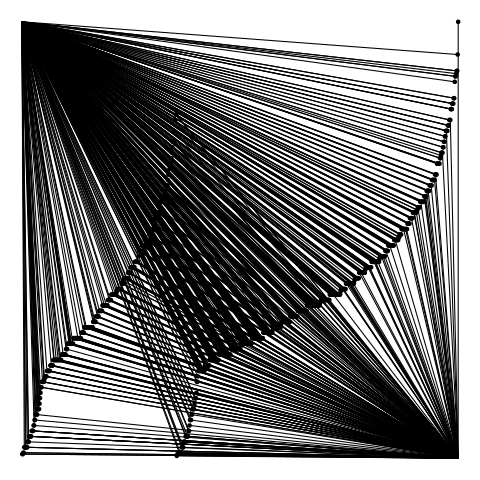

In [10]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	mutate(
		survived_x = case_when(
			Survived == 0 ~ 0,
			Survived == 1 ~ 887
		),
		survived_y = case_when(
			Survived == 0 ~ 80,
			Survived == 1 ~ 0
		)
	) %>%
	ggplot(aes(y = Age, x = num)) +
		geom_point() +
		geom_segment(aes(xend=survived_x, yend = survived_y)) +
		theme_nothing()

I mean I really just like the shape of this. I haven't convinced myself to fall in love with the points in there, but I'd like to play around with color, weight, transparancy and see what happens.

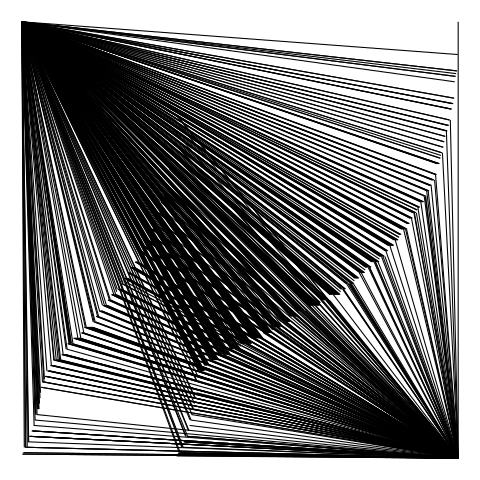

In [12]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	mutate(
		survived_x = case_when(
			Survived == 0 ~ 0,
			Survived == 1 ~ 887
		),
		survived_y = case_when(
			Survived == 0 ~ 80,
			Survived == 1 ~ 0
		)
	) %>%
	ggplot(aes(y = Age, x = num)) +
		# geom_point() +
		geom_segment(aes(xend=survived_x, yend = survived_y)) +
		theme_nothing()

Wow, it looks really interesting with a single color and no dots!

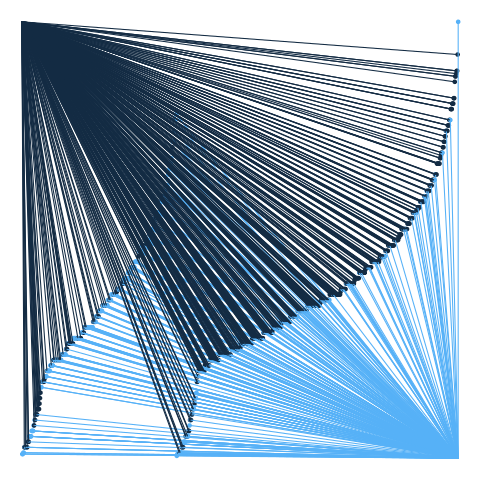

In [11]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	mutate(
		survived_x = case_when(
			Survived == 0 ~ 0,
			Survived == 1 ~ 887
		),
		survived_y = case_when(
			Survived == 0 ~ 80,
			Survived == 1 ~ 0
		)
	) %>%
	ggplot(aes(y = Age, x = num, col = Survived)) +
		geom_point() +
		geom_segment(aes(xend=survived_x, yend = survived_y)) +
		theme_nothing()